# Introduction to GIS in python with `geopandas`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd

/tmp/ipykernel_261198/3497688359.py:5: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


This contains the geometric data for the state of Arizona
The format is an ESRI shapefile, but there are other ways
to define geospatial data, with the most popular alternative
probably being a "geojson" file. Anyways, we can just open
this up with the `gpd.read_file` method, and it will automatically
figure out that it's a shapefile.

In [2]:
az = gpd.read_file(
    '/vsicurl/https://github.com/HAS-Tools-Fall2022'
    '/Course-Materials22/raw/main/data/arizona_shapefile'
    '/tl_2016_04_cousub.shp'
)
print(type(az))
az.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,005,91198,01934931,0400591198,Flagstaff,Flagstaff CCD,22,Z5,G4040,None,None,None,S,12277307143,38107703,+35.1066114,-111.3662497,"POLYGON ((-112.13370 35.85596, -112.13368 35.8..."
1,04,005,91838,01934953,0400591838,Kaibab Plateau,Kaibab Plateau CCD,22,Z5,G4040,None,None,None,S,7229190740,29332139,+36.5991097,-112.1368033,"POLYGON ((-112.66039 36.53941, -112.66033 36.5..."
2,04,005,91683,01934950,0400591683,Hualapai,Hualapai CCD,22,Z5,G4040,None,None,None,S,2342334297,3772175,+35.9271665,-113.1170408,"POLYGON ((-113.35416 36.04097, -113.35416 36.0..."
3,04,023,92295,01934961,0402392295,Nogales,Nogales CCD,22,Z5,G4040,None,None,None,S,1763427522,2397821,+31.4956008,-111.0171349,"POLYGON ((-111.36689 31.50009, -111.36687 31.5..."
4,04,023,92550,01934966,0402392550,Patagonia,Patagonia CCD,22,Z5,G4040,None,None,None,S,1440185727,690225,+31.5664619,-110.6410279,"POLYGON ((-110.96273 31.68695, -110.96251 31.6..."


Just like a regular pandas dataframe the geodataframe
has a bunch of helper methods for you to be able to 
see what's in the data. As usual, doing `df.head()`
will give a quick preview of what's inside it.

NOTE: One important thing, if you scroll over the the
      far right column in the printout you'll see that 
      there is a column for the geometry, which defines
      the shapes of the vector data.

You can even see the individual polygons in this case by 
indexing the geometry directly.

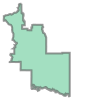

In [3]:
az['geometry'].iloc[0]

But, more importantly, it's easy to plot things! See
here we can just call the `.plot()` function and that
will automatically show you all of the geometries.

<AxesSubplot: >

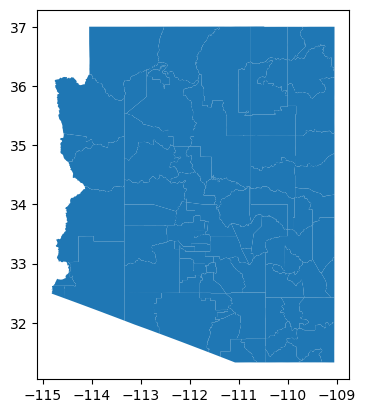

In [4]:
az.plot()

Further, you can plot the data in the columns
in an easy way by adding `column='COLUMN_NAME'`
to the plot call. Also, adding `legend=True`
will get you a colorbar. Here I'm just plotting
the area of the land in each of the polygons.

<AxesSubplot: >

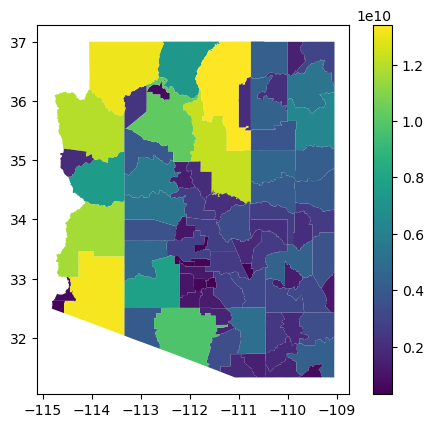

In [5]:
az.plot(column='ALAND', legend=True)

A minor aside, but you could also get this
information from the geometry directly - see here.
I'll also change the colormap with `cmap='turbo'`
just to spice things up.

/tmp/ipykernel_261198/4063054153.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  az['area'] = az.geometry.area


<AxesSubplot: >

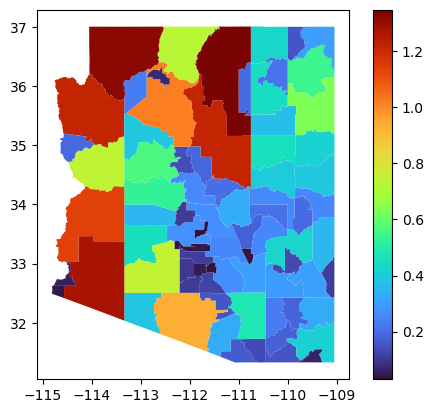

In [6]:
az['area'] = az.geometry.area
az.plot(column='area', legend=True, cmap='turbo')

Next up, we can also pull in the GAGES-II dataset,
which is a USGS product with the acronym "Geospatial 
Attributes of Gages for Evaluating Streamflow" and 
contains data from over 9000 located across the US.
This shapefile only contains some of the attributes,
but does not actually contain the streamflow timeseries.
We'll get to that in your homework.

In [7]:
gages = gpd.read_file(
     '/vsicurl/https://github.com/HAS-Tools-Fall2022'
     '/Course-Materials22/raw/main/data/gagesii_shapefile/'
     'gagesII_9322_sept30_2011.shp'   
)
gages.head()

,STAID,STANAME,CLASS,AGGECOREGI,DRAIN_SQKM,HUC02,LAT_GAGE,LNG_GAGE,STATE,HCDN_2009,ACTIVE09,FLYRS1900,FLYRS1950,FLYRS1990,geometry
0,01011000,"Allagash River near Allagash, Maine",Non-ref,NorthEast,3186.8440,01,47.069611,-69.079544,ME,None,yes,78.0,60.0,20.0,POINT (2027371.849 2964479.789)
1,01013500,"Fish River near Fort Kent, Maine",Ref,NorthEast,2252.6960,01,47.237394,-68.582642,ME,yes,yes,85.0,60.0,20.0,POINT (2058479.303 2992966.016)
2,01015800,"Aroostook River near Masardis, Maine",Non-ref,NorthEast,2313.7550,01,46.523003,-68.371764,ME,None,yes,51.0,51.0,19.0,POINT (2096533.991 2921785.543)
3,01016500,"MACHIAS RIVER NEAR ASHLAND, ME",Non-ref,NorthEast,847.7721,01,46.628311,-68.434792,ME,None,None,32.0,32.0,0.0,POINT (2088548.849 2931578.094)
4,01017000,"Aroostook River at Washburn, Maine",Non-ref,NorthEast,4278.9070,01,46.777294,-68.157194,ME,None,yes,79.0,60.0,20.0,POINT (2104213.711 2953507.477)


As before, we can plot this right up. Now here note that
we have points rather than polygons, so a different kind
of vector data. I modified some of the plot attributes
just to make things prettier. Here you can see the full 
US, including Alaska, Hawaii, and Puerto Rico.

<AxesSubplot: >

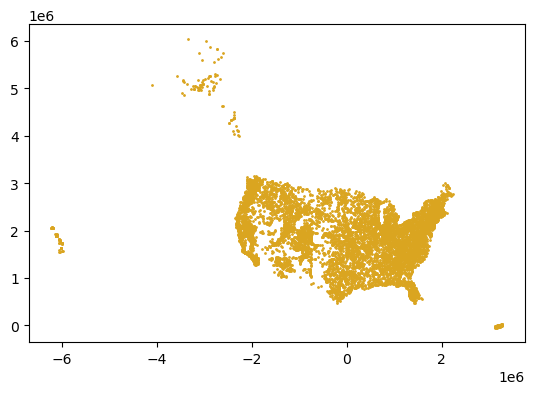

In [8]:
gages.plot(markersize=1, color='goldenrod')

Let's see if we can plot the GAGES data along with the
Arizona shapefile. Just to start off here, it might be
worth looking at the axis labels on the previous plots.
This is where the CRS stuff comes into play. 
Now, when you run this, you might ask: where's Arizona?
Great question - but let's jump down to the next cell to
figure out what happened.

<AxesSubplot: >

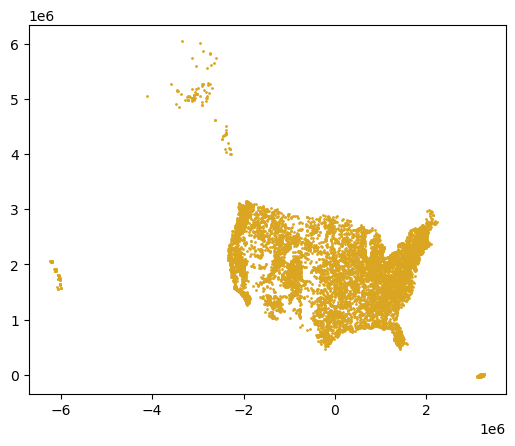

In [9]:
ax = gages.plot(markersize=1, color='goldenrod')
az.plot(ax=ax, color='crimson')

Here I've added some bells and whistles to debug the
behavior from above. Basically I added an `edgecolor`
and increased the `linewidth` so we can see where
the Arizona shapefile pops up - and it's somewhere
south of Texas... clearly wrong. So what's up?
It's the CRS. The Arizona shapefile has a lat/lon
projection, and the GAGES shapefile is based on 
meters, so they don't line up right. How do we fix this?
See the answer below!

<AxesSubplot: >

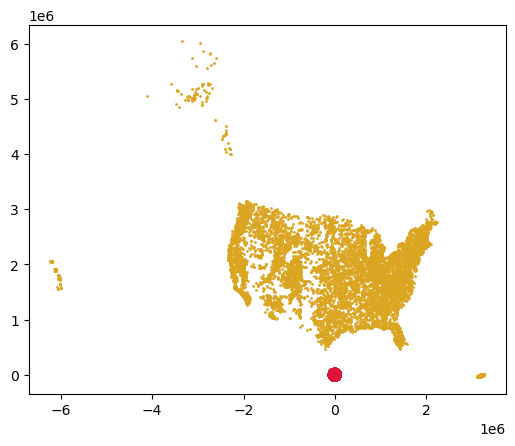

In [10]:
ax = gages.plot(markersize=1, color='goldenrod')
az.plot(
    ax=ax, 
    color='crimson', 
    edgecolor='crimson', 
    linewidth=10
)

To get things lined up we can simply do a coordinate
transformation. This is where geopandas comes in and
helps out a lot. We can simply take the CRS of one of 
the shapefiles and project the other one to the same 
CRS. I'm putting the GAGES data onto the AZ CRS here
just because I find lat/lon to be more intuitive. 
Then, it's easy enough to just plot it all together!

<AxesSubplot: >

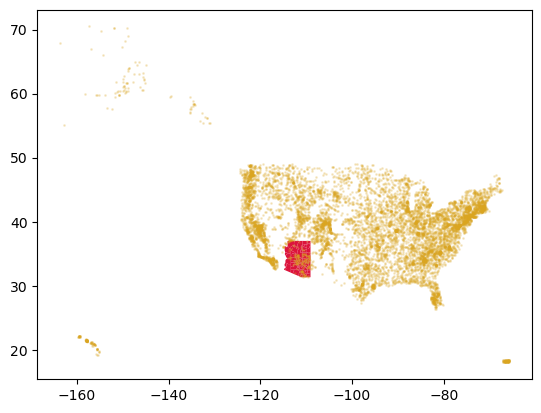

In [11]:
gages = gages.to_crs(az.crs)
ax = az.plot(color='crimson')
gages.plot(markersize=1, color='goldenrod', ax=ax, alpha=0.2)

Okay, next step you might want to do is just pull out
the GAGES data that is inside of Arizona. This is really
easy again thanks to geopandas with the `clip` function.
Then, we'll just plot the thing up!

Text(0.5, 1.0, 'Gages II data in Arizona')

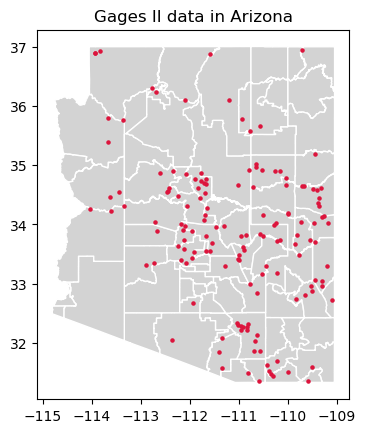

In [12]:
az_gages = gages.clip(az)
ax = az.plot(color='lightgrey', edgecolor='white')
az_gages.plot(ax=ax, color='crimson', markersize=5)
plt.title('Gages II data in Arizona')

Great, that's all I have for you here! There will be
more exercises combining this with stuff that you've
seen for pulling in the streamflow data from USGS.